In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df1 = df['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

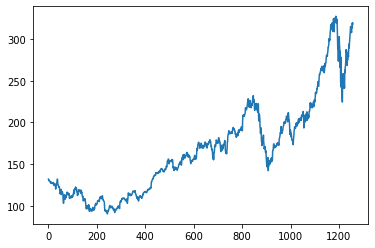

In [4]:
plt.plot(df1)

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [6]:
len(df1)

1258

In [7]:
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [8]:
training_size, test_size

(880, 378)

In [9]:
import numpy
# convert an array of values into a dataset matrix      # Taken from Krish Naik, MachinelearningMastery
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [11]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
X_train.shape[0],X_train.shape[1]

(829, 50)

In [13]:
X_test.shape[0],X_test.shape[1]

(327, 50)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
13/13 [==============================] - 7s 201ms/step - loss: 0.0219 - val_loss: 0.0642
Epoch 2/10
13/13 [==============================] - 1s 104ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 3/10
13/13 [==============================] - 1s 106ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 4/10
13/13 [==============================] - 1s 101ms/step - loss: 8.4954e-04 - val_loss: 0.0039
Epoch 5/10
13/13 [==============================] - 1s 103ms/step - loss: 8.0986e-04 - val_loss: 0.0041
Epoch 6/10
13/13 [==============================] - 1s 103ms/step - loss: 7.1343e-04 - val_loss: 0.0044
Epoch 7/10
13/13 [==============================] - 1s 102ms/step - loss: 6.9459e-04 - val_loss: 0.0044
Epoch 8/10
13/13 [==============================] - 1s 104ms/step - loss: 6.8540e-04 - val_loss: 0.0043
Epoch 9/10
13/13 [==============================] - 1s 115ms/step - loss: 6.5911e-04 - val_loss: 0.0046
Epoch 10/10
13/13 [==============================] - 1s 105ms/step - loss: 6

In [18]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [20]:
test_predict

array([[156.40445],
       [157.36948],
       [158.51361],
       [159.77283],
       [161.0841 ],
       [162.38562],
       [163.64352],
       [164.82465],
       [165.91234],
       [166.89275],
       [167.76433],
       [168.5382 ],
       [169.2147 ],
       [169.81438],
       [170.36157],
       [170.87128],
       [171.35605],
       [171.80614],
       [172.23167],
       [172.64384],
       [173.04382],
       [173.42126],
       [173.75146],
       [174.02571],
       [174.2937 ],
       [174.59828],
       [174.96536],
       [175.41893],
       [175.98155],
       [176.66743],
       [177.45343],
       [178.32515],
       [179.31862],
       [180.39629],
       [181.50116],
       [182.5712 ],
       [183.57935],
       [184.50787],
       [185.35681],
       [186.13715],
       [186.87924],
       [187.60855],
       [188.33751],
       [189.07858],
       [189.85811],
       [190.6741 ],
       [191.52534],
       [192.38452],
       [193.22772],
       [194.03795],


In [21]:
import math
from sklearn.metrics import mean_squared_error

error = math.sqrt(mean_squared_error(y_test,test_predict))
error

230.08003201301435

In [22]:
len(train_predict)

829

In [23]:
len(df1)-1

1257

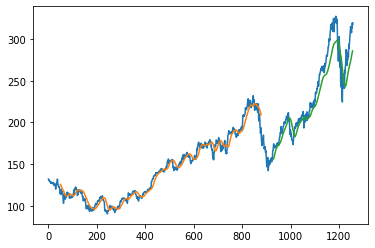

In [24]:
### Plotting 
# shift train predictions for plotting
time_step=50                                       #Copied from machinelearningmastery
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
len(test_data)

378

In [26]:
x_input=test_data[328:].reshape(1,-1)
x_input.shape

(1, 50)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
from numpy import array   # copied from Krish Naik

lst_output=[]
n_steps=50
i=0
while(i<30):
    
    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8355166]
51
1 day input [0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.83551657]
1 day output [[0.83950454]]
2 day input [0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628

**Predicting next 30 days market**

In [29]:
day_new = np.arange(1,51)
day_pred = np.arange(51,81)

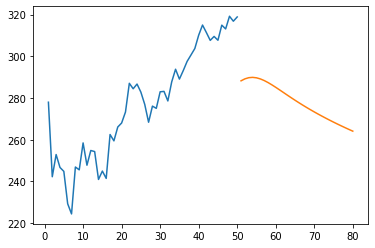

In [30]:
plt.plot(day_new,scaler.inverse_transform(df1[1208:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

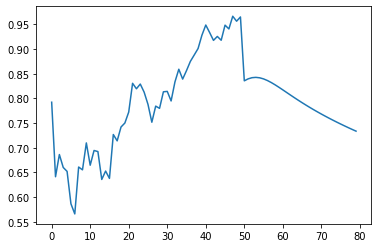

In [31]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1208:])

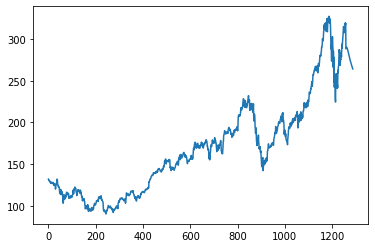

In [32]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)